# 데이터 분석 실무
## 파이썬 라이브러리를 활용해서 통계 기법을 적용한 데이터 분석을 배우는 과정입니다.

#### 분산분석1 : 광고채널별 효과 검정(일원분산분석)

* 지금부터 간단한 예시코드를 중심으로 데이터 분석 실습을 진행하겠습니다.

* 광고채널별 효과 검정을 위한 가상 데이터셋을 만들어보겠습니다.
* A 통신사에서는 페이스북, 인스타그램, 유튜브 세 가지 채널을 활용해서 광고를 하고 있습니다. 각 채널의 효과가 어떻게 되나 궁금합니다. 채널별 광고 클릭 수를 임의로 만들었습니다.

    * facebook: 페이스북 클릭 수
    * instagram: 인스타그램 클릭 수
    * youtube: 유튜브 클릭 수

* 채널별 광고 효과를 일원분산분석을 활용해서 가설을 검정해보겠습니다.

##### 0. 필요 라이브러리 불러오기

__사내 PC 실습 안내__ 
- 본 실습은 외부 라이브러리를 설치하는 내용이 포함되어 있습니다.
- 사내 PC에서 외부 라이브러리 설치 시, SSL 인증 오류가 발생할 수 있습니다.
- 아래 코드와 같이, pypi 서버 신뢰 옵션을 추가하여 SSL 인증을 생략합니다.
- 따라서, 내용은 영상 강의와 다를 수 있습니다.

```cmd
pip install --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org -U [설치할 패키지 명]
```


In [1]:
# !pip install statsmodels
!pip install --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org -U statsmodels

In [2]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

##### 1. 데이터 생성

In [3]:
# 광고 채널별 클릭 수 데이터 예시
facebook = [10, 15, 12, 13, 9]
instagram = [8, 11, 9, 10, 12]
youtube = [13, 9, 11, 12, 10]

##### 2. 가설설정

In [4]:
# 귀무가설(H0): 그룹 간의 평균은 동일하다.
# 대립가설(H1): 적어도 하나의 그룹 간의 평균은 다르다.

##### 3. 검정통계량 계산

In [5]:
# 모든 그룹 데이터를 하나의 배열로 합침
data = pd.DataFrame({'Clicks': facebook + instagram + youtube, 'Channel': ['Facebook'] * 5 + ['Instagram'] * 5 + ['YouTube'] * 5})
data

,Clicks,Channel
0,10,Facebook
1,15,Facebook
2,12,Facebook
3,13,Facebook
4,9,Facebook
5,8,Instagram
6,11,Instagram
7,9,Instagram
8,10,Instagram
9,12,Instagram


In [6]:
# 일원분산분석 수행
model = ols('Clicks ~ Channel', data=data).fit()
anova_table = anova_lm(model, typ=1)

##### 4. 결과 출력

In [7]:
print("일원분산분석 결과:")
anova_table

일원분산분석 결과:


,df,sum_sq,mean_sq,F,PR(>F)
Channel,2.0,8.133333,4.066667,1.140187,0.352087
Residual,12.0,42.800000,3.566667,NaN,NaN


##### 5. 사후 검증

In [8]:
# 사후 검증 (Tukey's HSD)
posthoc = pairwise_tukeyhsd(data['Clicks'], data['Channel'])

In [9]:
print("사후 검증 결과:")
print(posthoc)

사후 검증 결과:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
 Facebook Instagram     -1.8 0.3222 -4.9866 1.3866  False
 Facebook   YouTube     -0.8  0.785 -3.9866 2.3866  False
Instagram   YouTube      1.0  0.688 -2.1866 4.1866  False
---------------------------------------------------------


### 분산분석2 : 광고채널/유형별 효과 검정(이원분산분석)

* 지금부터 간단한 예시코드를 중심으로 데이터 분석 실습을 진행하겠습니다.

* 광고채널별 효과 검정을 위한 가상 데이터셋을 만들어보겠습니다.
* A 통신사에서는 페이스북, 인스타그램, 유튜브 세 가지 채널과 이미지와 비디오라는 두 가지 유형을 활용해서 광고를 하고 있습니다. 각 채널과 유형의 효과가 어떻게 되나 궁금합니다. 채널/유형별 광고 클릭 수를 임의로 만들었습니다.

    * Channel: 채널
    * AdType: 광고 유형
    * Clicks: 클릭 수

* 채널/유형별 광고 효과를 일원분산분석을 활용해서 가설을 검정해보겠습니다.

##### 0. 필요 라이브러리 불러오기

In [10]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


##### 1. 데이터 생성

In [11]:
# 광고 클릭 수 데이터 생성
data = {'Channel': ['Facebook', 'Instagram', 'YouTube', 'Facebook', 'Instagram', 'YouTube', 'Facebook', 'Instagram', 'YouTube'],
        'AdType': ['Image', 'Image', 'Video', 'Image', 'Video', 'Video', 'Image', 'Image', 'Video'],
        'Clicks': [10, 15, 21, 13, 9, 22, 8, 11, 25]}

df = pd.DataFrame(data)

##### 2. 가설설정

In [12]:
# 광고 채널에 따른 클릭 수의 차이에 대한 가설:
# 귀무가설(H0): 광고 채널에 따른 클릭 수의 평균은 모두 동일하다.
# 대립가설(H1): 광고 채널에 따른 클릭 수의 평균은 적어도 하나가 다르다.

# 광고 유형에 따른 클릭 수의 차이에 대한 가설:
# 귀무가설(H0): 광고 유형에 따른 클릭 수의 평균은 모두 동일하다.
# 대립가설(H1): 광고 유형에 따른 클릭 수의 평균은 적어도 하나가 다르다.

# 광고 채널과 광고 유형의 상호작용 효과에 대한 가설:
# 귀무가설(H0): 광고 채널과 광고 유형 간의 상호작용 효과는 존재하지 않는다.
# 대립가설(H1): 광고 채널과 광고 유형 간의 상호작용 효과는 존재한다.

##### 3. 검정통계량 계산

In [13]:
# 이원분산분석 모델 설정
model = ols('Clicks ~ Channel + AdType + Channel:AdType', data=df).fit()

In [ ]:
# 이원분산분석 수행
anova_table = sm.stats.anova_lm(model)

##### 4. 결과 출력

In [15]:
print("이원분산분석 결과:")
anova_table

이원분산분석 결과:


,df,sum_sq,mean_sq,F,PR(>F)
Channel,2.0,274.888889,137.444444,23.428030,0.002887
AdType,1.0,10.666667,10.666667,1.818182,0.235387
Channel:AdType,2.0,2.872241,1.436121,0.244793,0.791728
Residual,5.0,29.333333,5.866667,NaN,NaN


##### 5. 사후 검증

In [ ]:
df['combi']=df['Channel'] + " / " + df['AdType']

In [ ]:
# 사후 검증 (Tukey's HSD)
posthoc = pairwise_tukeyhsd(df['Clicks'], df['combi'])


In [ ]:
print("사후 검증 결과:")b
print(posthoc)

### 다른 방법

In [16]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [17]:
df.head(2)

,Channel,AdType,Clicks
0,Facebook,Image,10
1,Instagram,Image,15


#### 1-Way ANOVA

In [28]:
model = ols(formula='Clicks ~ C(Channel)', data=df).fit()
result_1 = sm.stats.anova_lm(model, typ=1)
result_1

,df,sum_sq,mean_sq,F,PR(>F)
C(Channel),2.0,274.888889,137.444444,20.616667,0.00205
Residual,6.0,40.000000,6.666667,NaN,NaN


#### 2-Way ANOVA

In [29]:
model = ols(formula='Clicks ~ C(Channel) + C(AdType)', data=df).fit()
result_1 = sm.stats.anova_lm(model, typ=1)
result_1

,df,sum_sq,mean_sq,F,PR(>F)
C(Channel),2.0,274.888889,137.444444,23.428030,0.002887
C(AdType),1.0,10.666667,10.666667,1.818182,0.235387
Residual,5.0,29.333333,5.866667,NaN,NaN


#### 1-Way ANOVA Post-Hoc Test

In [31]:
result_post = pairwise_tukeyhsd(df['Clicks'], df['Channel'], alpha=0.05)

In [32]:
print(result_post)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
 Facebook Instagram   1.3333 0.8085 -5.1352  7.8018  False
 Facebook   YouTube  12.3333 0.0027  5.8648 18.8018   True
Instagram   YouTube     11.0 0.0048  4.5315 17.4685   True
----------------------------------------------------------


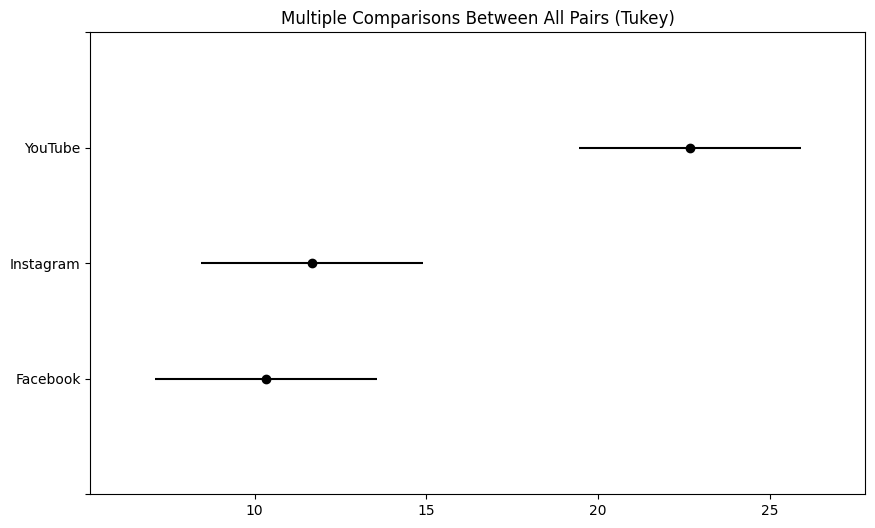

In [33]:
import matplotlib.pyplot as plt
result_post.plot_simultaneous()
plt.show()